In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [50]:
filename = 'big.dem'
with open(filename, 'r') as f:
    lines = f.readlines()
    lines = [line.strip() for line in lines]
    lines = [line.split() for line in lines]
    lines = [[float(value) for value in line] for line in lines]

dane=lines[0]


lines = lines[1:]


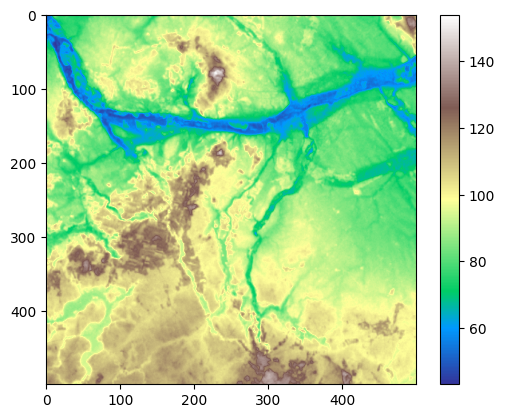

In [51]:
lines = np.array(lines)

plt.imshow(lines, cmap='terrain')
plt.colorbar()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


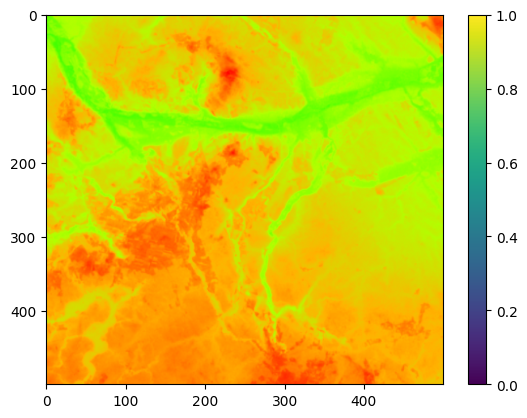

In [52]:

max_value = np.amax(lines)
img = np.zeros((int(dane[0]), int(dane[1]), 3))
for i in range(int(dane[0])):
    for j in range(int(dane[1])):
        img[i, j] = [-(abs(2*lines[i][j]/max_value-2))+1.7, -(abs(2*lines[i][j]/max_value))+2, 0]

plt.imshow(img, aspect='auto')

plt.colorbar()
plt.show()